In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_exam.csv')

In [3]:
#Training and labels
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [45]:
df

,X,Y,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


# Normalising the data

In [4]:
X = (X - np.mean(X))/np.std(X)

# Adding bias term 

In [5]:
X.insert(loc = 0,column = 'bias',value=np.ones(X.shape[0]))

In [6]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [7]:
w = np.random.normal(0,1,3) 

In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [9]:
def loss(y,hx):
    return ((-y * np.log(hx)) - (1-y) * np.log(1-hx)).mean()

In [10]:
def gradient_descent(w,alpha,num_iters):
    theta = []
    cost = []
    for i in range(num_iters):
        pred = np.dot(X_train,w)
        h = sigmoid(pred)
        error = loss(Y_train,h)
        grad = np.dot(X_train.T,h- Y_train)/Y_train.size
        theta.append(w)
        cost.append(error)
        w = w - alpha * grad
    return cost,theta

In [11]:
cost, theta = gradient_descent(w,0.3,500)

In [12]:
theta = theta[-1]

In [53]:
theta

array([1.49401589, 3.74162873, 3.06979853])

Text(0,0.5,'value of cost')

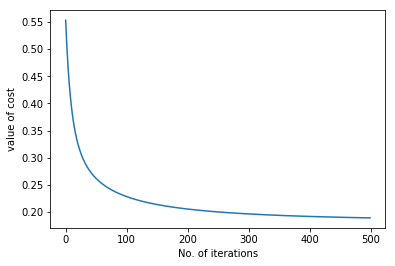

In [13]:
plt.plot(cost)
plt.xlabel("No. of iterations")
plt.ylabel("value of cost")

In [14]:
def pred(data):
    return sigmoid(np.dot(data,theta))

In [15]:
a = pred(X_test)

In [16]:
a = a >= 0.5

In [22]:
pred = pd.DataFrame(data = {"label":a}).astype(int)

In [32]:
Y_test = Y_test.reset_index(drop=True)

In [35]:
predicted_data = pd.concat([pred,pd.DataFrame({"Actual_label":Y_test})],axis = 1)

In [37]:
predicted_data

,label,Actual_label
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,1


In [40]:
accuracy = 1 - np.sum(abs(predicted_data['label'] - predicted_data['Actual_label']))/predicted_data.shape[0]

In [42]:
print("Accuracy of the model without any parametersc tunning is :",accuracy)

Accuracy of the model without any parameter tunning is : 0.8666666666666667


In [77]:
plot_data = pd.concat([X,Y],axis=1)

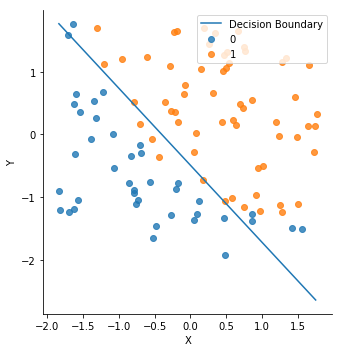

In [83]:
import seaborn as sns 
sns.lmplot( x="X", y="Y", data=plot_data, fit_reg=False,hue = 'label' ,legend=False)
x_0 = min(plot_data['X'])
x_1 = max(plot_data['X'])
plt.plot([x_0,1 * -(theta[0] + theta[1]* x_0)/theta[2]], [ x_1,1 * -(theta[0] + theta[1]* x_1)/theta[2] ],label = "Decision Boundary")
plt.legend(loc='upper right')
